In [6]:
!pip install gradio
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


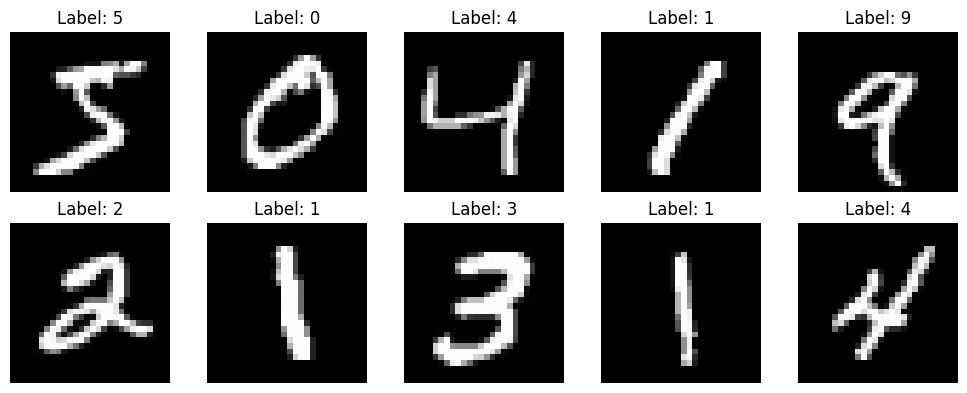

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - accuracy: 0.9110 - loss: 0.3011 - val_accuracy: 0.9885 - val_loss: 0.0421
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9903 - val_loss: 0.0370
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9918 - val_loss: 0.0325
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9910 - val_loss: 0.0327
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9876 - loss: 0.0371
Test accuracy: 0.991599977016449
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True i

In [7]:
# pip install gradio
# pip install tensorflow

import pandas as pd
import numpy as np
data=pd.read_csv('sample_submission.csv')
data.head()
data.shape
data.isnull().sum()
data.duplicated().sum()
data.info()
import tensorflow as tf
import matplotlib.pyplot as plt
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test= x_train/255.0, x_test/255.0
import matplotlib.pyplot as plt

def plot_sample(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming x_train and y_train are defined
plot_sample(x_train, y_train)

"""import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display a sample image
plt.imshow(x_train[9], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()
"""

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train[...,np.newaxis], y_train,epochs=5,validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test[..., np.newaxis], y_test)
print('Test accuracy:', test_acc)


import gradio as gr

import numpy as np
import gradio as gr
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image

from PIL import Image
import numpy as np

def preprocess_image(image):
    """Preprocess the image to be compatible with the MNIST model input.

    Parameters:
    image (PIL.Image or np.ndarray): The input image to be preprocessed.

    Returns:
    np.ndarray: The preprocessed image.
    """

    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Convert to greyscale
    image = image.convert('L')

    # Resize to 28x28 pixels
    image = image.resize((28, 28))

    # Convert to numpy array and normalize
    image = np.array(image) / 255.0

    # Reshape to match the input shape of the model
    image = image.reshape(1, 28, 28)

    return image

# Prediction function
def predict_digit(image):
    # Preprocess the image
    image = preprocess_image(image)

    # Make the prediction
    prediction = model.predict(image)

    return int(np.argmax(prediction))  # Ensure the output is a plain Python integer

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode='RGB'),
    outputs='label',
    live=True,
    title='MNIST Digit Classifier',
    description='Draw a digit (0-9) and see the prediction'
)

interface.launch()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')